In [264]:
import matplotlib.pyplot as plt
import numpy as np
from graspy.simulations import sbm
from numpy.random import normal, poisson
from scipy.stats import norm
import random
import itertools
from math import exp as ex
from math import log
import matplotlib.pyplot as plt

%matplotlib inline

In [265]:
def get_edge(com1,com2,nodesPerCom,perActive):
    activeEdge = int(perActive*nodesPerCom**2/2)
    indx = []
    
    if com1 > com2:
        com1,com2 = com2,com1
        
    node1 = range((com1-1)*nodesPerCom,com1*nodesPerCom)
    node2 = range((com2-1)*nodesPerCom,com2*nodesPerCom)
    
    for i in node1:
        for j in node2:
            if i != j:
                indx.append((i,j))
    
    indx = random.sample(indx,activeEdge)
    
    return indx

In [532]:
N = 300 #total nodes
k = 12 #community number
P = .25
dim = 2
totalSample = 200

phen1 = np.asarray([100,100])
phen2Ratio = np.asarray([0.5, 0.5])
phen2 = phen1*phen2Ratio

Phen1activeCom1 = [(2,4),(6,8)]
Phen1activeCom2 = [(3,5),(9,11)]
Phen2activeCom1 = [(2,4),(3,5)]
Phen2activeCom2 = [(6,8),(9,11)]

y1 = np.zeros(totalSample,dtype=int)
y2 = np.zeros(totalSample,dtype=int)
nodeFlags = np.zeros(k)

In [533]:
G1 = np.zeros((phen1[0],N,N))
G2 = np.zeros((phen1[1],N,N))
indxG1 = []
indxG2 = []

nodesPerCom = int(N/k)
n = [nodesPerCom]*k
p = [[0.2]*k]*k
wt = [[normal]*k]*k
wtargs = []

for (i,j) in Phen1activeCom1:
    indxG1 = indxG1 + get_edge(i,i,nodesPerCom,P)
    indxG1 = indxG1 + get_edge(j,j,nodesPerCom,P)
    indxG1 = indxG1 + get_edge(i,j,nodesPerCom,P)
    
for (i,j) in Phen1activeCom2:
    indxG2 = indxG2 + get_edge(i,i,nodesPerCom,P)
    indxG2 = indxG2 + get_edge(j,j,nodesPerCom,P)
    indxG2 = indxG2 + get_edge(i,j,nodesPerCom,P)
    

indx_p2c11 = get_edge(Phen2activeCom1[0][0],Phen2activeCom1[0][1],nodesPerCom,P)
indx_p2c12 = get_edge(Phen2activeCom1[1][0],Phen2activeCom1[1][1],nodesPerCom,P)

indx_p2c21 = get_edge(Phen2activeCom2[0][0],Phen2activeCom2[0][1],nodesPerCom,P)
indx_p2c22 = get_edge(Phen2activeCom2[1][0],Phen2activeCom2[1][1],nodesPerCom,P)

for i in range(0,k):
    wtargs.append([])
    for j in range(0,k):
        if i!=j:
            wtargs[i].append({'loc': 0.1, 'scale': 0.18})
        else:
            wtargs[i].append({'loc': 0.3, 'scale': 0.18})

for k_ in range(0,phen1[0]):
    y1[k_] = 1
    G1[k_,:,:] = sbm(n=n, p=p, wt=wt, wtargs=wtargs)

    DiffEdge = norm.rvs(size=len(indxG1),loc=0.2,scale=0.18)
    for i in range(0,len(indxG1)):
        G1[k_,int(indxG1[i][0]),int(indxG1[i][1])] = DiffEdge[i] 
        G1[k_,int(indxG1[i][1]),int(indxG1[i][0])] = DiffEdge[i] 
    
    if k_ < phen2[0]:
        DiffEdge = norm.rvs(size=len(indx_p2c12),loc=0.2,scale=0.18)
        for i in range(0,len(indx_p2c12)):
            y2[k_] = 1
            
            G1[k_,int(indx_p2c12[i][0]),int(indx_p2c12[i][1])] = DiffEdge[i] 
            G1[k_,int(indx_p2c12[i][1]),int(indx_p2c12[i][0])] = DiffEdge[i] 
    else:
        DiffEdge = norm.rvs(size=len(indx_p2c22),loc=0.2,scale=0.18)
        for i in range(0,len(indx_p2c22)):
            G1[k_,int(indx_p2c22[i][0]),int(indx_p2c22[i][1])] = DiffEdge[i] 
            G1[k_,int(indx_p2c22[i][1]),int(indx_p2c22[i][0])] = DiffEdge[i]
            

for k_ in range(0,phen1[1]):
    G2[k_,:,:] = sbm(n=n, p=p, wt=wt, wtargs=wtargs)

    DiffEdge = norm.rvs(size=len(indxG2),loc=0.2,scale=0.18)
    for i in range(0,len(indxG1)):
        G2[k_,int(indxG2[i][0]),int(indxG2[i][1])] = DiffEdge[i] 
        G2[k_,int(indxG2[i][1]),int(indxG2[i][0])] = DiffEdge[i] 
    
    if k_ < phen2[1]:
        y2[k_+phen1[0]] = 1
        
        DiffEdge = norm.rvs(size=len(indx_p2c11),loc=0.2,scale=0.18)
        for i in range(0,len(indx_p2c11)):
            G2[k_,int(indx_p2c11[i][0]),int(indx_p2c11[i][1])] = DiffEdge[i] 
            G2[k_,int(indx_p2c11[i][1]),int(indx_p2c11[i][0])] = DiffEdge[i] 
    else:
        DiffEdge = norm.rvs(size=len(indx_p2c21),loc=0.2,scale=0.18)
        for i in range(0,len(indx_p2c21)):
            G2[k_,int(indx_p2c21[i][0]),int(indx_p2c21[i][1])] = DiffEdge[i] 
            G2[k_,int(indx_p2c21[i][1]),int(indx_p2c21[i][0])] = DiffEdge[i]

In [2]:
from graspy.plot import heatmap

heatmap(G1[0:50,:].mean(axis = 0), title ='SBM phenotype1 class1 phenotype2 class 1 Simulation')
heatmap(G1[50:100,:].mean(axis = 0), title ='SBM phenotype1 class1 phenotype2 class 2 Simulation')
heatmap(G2[0:50,:].mean(axis = 0), title ='SBM phenotype1 class2 phenotype2 class 1 Simulation')
heatmap(G2[50:100,:].mean(axis = 0), title ='SBM phenotype1 class2 phenotype2 class 2 Simulation')

NameError: name 'G1' is not defined

In [535]:
A = np.concatenate((G1[0:40,:,:],G1[50:90,:,:],G2[0:40,:,:],G2[50:90,:,:]), axis=0)
y1_ = np.concatenate((y1[0:40],y1[50:90],y1[100:140],y1[150:190]), axis=0)
y2_ = np.concatenate((y2[0:40],y2[50:90],y2[100:140],y2[150:190]), axis=0)

Atest = np.concatenate((G1[40:50,:,:],G1[90:100,:,:],G2[40:50,:,:],G2[90:100,:,:]), axis=0)
y1test = np.concatenate((y1[40:50],y1[90:100],y1[140:150],y1[190:200]), axis=0)
y2test = np.concatenate((y2[40:50],y2[90:100],y2[140:150],y2[190:200]), axis=0)

In [536]:
def fit_cls(A,e1,e2,y1,y2,iter,stepSize,rho,gamma):
    sampleTest,N,_ = A.shape
    dim1,_ = e1.shape
    dim2,_ = e2.shape
    
    B = np.ones((dim1,N,N), dtype=float)/(dim1*N*N)
    a = np.ones((dim2,dim1), dtype=float)/(dim2*dim1)
    b = 0
    
    S = np.zeros((dim1,1), dtype=float)

    for itr in range(1,iter):
        loss = 0
        gradB = np.zeros((dim1,N,N), dtype=float)
        grada = np.zeros((dim2,dim1), dtype=float)
        sym = np.zeros((dim1,N,N), dtype=float)
        gradb = 0
        for k in range(0,sampleTest):
            tmp = b
            tmpGradB = np.zeros((dim1,N,N), dtype=float) 
            
            
            
            for i in range(0,dim1):
                S[i] = np.sum(B[i,:,:]*A[k,:,:])
                
                
            for j in range(0,dim1):
                val = e1[j,:].reshape(1,-1)@S.reshape(-1,1)
                if y1[k] == j:
                    tmp -= val**2
                    for i in range(0,dim):
                        #tmp -= e1[j,i]*np.sum(B[i,:,:]*A[k,:,:]) 
                        tmpGradB[i,:,:] -= 2*val*e1[j,i]*A[k,:,:] 
                else:
                    tmp += val**2
                    for i in range(0,dim):
                        #tmp += e1[j,i]*np.sum(B[i,:,:]*A[k,:,:])
                        tmpGradB[i,:,:] += 2*val*e1[j,i]*A[k,:,:]
                        
            for j in range(0,dim2):
                val = e1[j,:].reshape(1,-1)@(a@S.reshape(-1,1))
                
                if y2[k] == j:
                    tmp -= val**2
                    for i in range(0,dim1):
                        tmpGradB[i,:,:] -= 2*val*( e2[j,:]@a[:,i] )*A[k,:,:]
                else:
                    tmp += val**2
                    for i in range(0,dim1):
                        tmpGradB[i,:,:] += 2*val*( e2[j,:]@a[:,i] )*A[k,:,:]
                        
        
            phi = ex(tmp)
            phi_ = phi/(1+phi)
            
            gradB += phi_*tmpGradB
            
        for i in range(0,dim):
            sym[i,:,:] = 2*(B[i,:,:]-B[i,:,:].T)

        gradB = gradB/sampleTest + rho*np.sign(B) + 2*gamma*B + sym
        B = B - stepSize*gradB
        
        for k in range(0,sampleTest):
            tmp = b
            tmpGrada = np.zeros((dim2,dim1),dtype=float)
            
            for i in range(0,dim1):
                S[i] = np.sum(B[i,:,:]*A[k,:,:])
                
                
            for j in range(0,dim1):
                val = e1[j,:].reshape(1,-1)@S.reshape(-1,1)
                if y1[k] == j:
                    tmp -= val**2
                else:
                    tmp += val**2
                        
            for j in range(0,dim2):
                val = e1[j,:].reshape(1,-1)@(a@S.reshape(-1,1))
                if y2[k] == j:
                    tmp -= val**2
                else:
                    tmp += val**2
                     
            
            for j in range(0,dim2):
                if y2[k] == j:
                    tmpGrada -= e2[j,:].reshape(-1,1)@S.reshape(1,-1)
                else:
                    tmpGrada += e2[j,:].reshape(-1,1)@S.reshape(1,-1)
            
            phi = ex(tmp)
            phi_ = phi/(1+phi)
            
            grada += phi_*tmpGrada
        
        a = a - stepSize*grada/sampleTest
        #print(a)
        
        for k in range(0,sampleTest):
            tmp = b 
            for j in range(0,dim1):
                val = e1[j,:].reshape(1,-1)@S.reshape(-1,1)
                if y1[k] == j:
                    tmp -= val**2
                else:
                    tmp += val**2
                        
            for j in range(0,dim2):
                val = e1[j,:].reshape(1,-1)@(a@S.reshape(-1,1))
                if y2[k] == j:
                    tmp -= val**2
                else:
                    tmp += val**2
                        
            loss += log(1+phi)
            phi = ex(tmp)
            
            gradb += phi/(1+phi)
            
        b = b - stepSize*gradb/sampleTest
    print(loss)
    return B,a,b

In [537]:
def predictAccuracy(B,a,b,e1,e2,A,y1,y2):
    l = len(y1)
    dim1,_ = e1.shape
    dim2,_ = e2.shape
    #print(y2)
    accuracy = np.zeros((2,1),dtype=float)
    S = np.zeros((dim1,1), dtype=float)
    
    for m in range(0,l):
        lbl1 = []
        lbl2 = []
        for i in range(0,dim1):
                S[i] = np.sum(B[i,:,:]*A[m,:,:])
                
        for j in range(0,dim1):
            lbl1.append(e1[j,:]@S)
            
        for j in range(0,dim2):
            lbl2.append(e2[j,:]@a@S)
        
        print(lbl1,lbl2,y1[m],y2[m])
        
        phen1 = np.argmax(np.abs(np.asarray(lbl1)))
        phen2 = np.argmax(np.abs(np.asarray(lbl2)))
        #print(e@R@A[i,:,:]@C,y[i])
        #print('hi')
        #print(cls, y[i])
        if phen1 == y1[m]:
            accuracy[0] += 1
            
        if phen2 == y2[m]:
            accuracy[1] += 1

    return accuracy*100/l

In [538]:
def crossValidate(A,e1,e2,y1,y2,iter,stepSize,rho,gamma,fold):
    accuracy = np.zeros((2,1),dtype=float)
    _,count = np.unique(y, return_counts=True)
    totalSample, N, _ = A.shape
    
    count = count/totalSample
    indx = np.asarray(range(0,totalSample))
    random.shuffle(indx)
    
    testSample = int(totalSample/fold)
    for i in range(0,fold):
        indx = np.roll(indx,testSample)
        B,a,b = fit_cls(A[indx[0:totalSample-testSample],:,:],e1,e2,y1[indx[0:totalSample-testSample]],y2[indx[0:totalSample-testSample]],iter,stepSize,rho,gamma)
        testAccuracy = predictAccuracy(B,a,b,e1,e2,A[indx[totalSample-testSample:totalSample],:,:],y1[indx[totalSample-testSample:totalSample]],y2[indx[totalSample-testSample:totalSample]])
        accuracy += testAccuracy

    accuracy = accuracy/fold
    return accuracy

In [539]:
def getBase(dim):
    e = np.zeros((dim,dim),dtype=float)
    labelVec = np.asarray(range(1,dim+1),dtype=float)
    e[0,:] = labelVec/(labelVec@labelVec.T)**.5

    for i in range(1,dim):
        tmp = np.roll(labelVec,i)
        tmp = tmp.reshape(1,-1)
        tmp_ = tmp.copy()
        for j in range(0,i):
            eTmp = e[j,:].reshape(1,-1)
            tmp_ -= (tmp@eTmp.T/(eTmp@eTmp.T))*eTmp
            #print(tmp.shape)
        e[i,:] = tmp_/(tmp_@tmp_.T)**.5
    return e

In [637]:
iter = 3000
stepSize = 1e-2
B = np.ones((dim,N,N), dtype=float)/(dim*N*N)
b = 0
rho = 1e-4
gamma = 1e-6

#fold = 10
#accuracy = 0

_,count1 = np.unique(y1, return_counts=True)
dim1 = len(count1)

_,count2 = np.unique(y2, return_counts=True)
dim2 = len(count2)

e1 = getBase(dim1)
e2 = getBase(dim2)
totalSample, N, _ = A.shape


B,a,b = fit_cls(A,e2,e1,y1_,y2_,iter,stepSize,rho,gamma)
testAccuracy = predictAccuracy(B,a,b,e1,e2,Atest,y1test,y2test)    

print(testAccuracy)

#indx = np.asarray(range(0,totalSample))
#random.shuffle(indx)

#testSample = int(totalSample/fold)
#for i in range(0,fold):
#    print("Doing test on %d fold.........\n"%(i+1))
#    B,a,b = fit_cls(A[indx[0:totalSample-testSample],:,:],e1,e2,y1[indx[0:totalSample-testSample]],y2[indx[0:totalSample-testSample]],iter,stepSize,rho,gamma)
#    testAccuracy = predictAccuracy(B,a,b,e1,e2,A[indx[totalSample-testSample:totalSample],:,:],y1[indx[totalSample-testSample:totalSample]],y2[indx[totalSample-testSample:totalSample]])    
#    accuracy += testAccuracy
#    print(testAccuracy)
    
#    indx = np.roll(indx,testSample)
#accuracy = accuracy/fold
#print("Total accuracy %f %f\n"%(accuracy[0],accuracy[1]))

4.248202529259213
[array([0.3291404]), array([1.49047549])] [array([0.35599403]), array([0.13958531])] 1 1
[array([0.36656741]), array([1.53630867])] [array([0.37882632]), array([0.14837586])] 1 1
[array([0.33445792]), array([1.54143604])] [array([0.36558199]), array([0.14337997])] 1 1
[array([0.31064709]), array([1.50845375])] [array([0.35051052]), array([0.13756849])] 1 1
[array([0.28259428]), array([1.55204885])] [array([0.3445223]), array([0.13544404])] 1 1
[array([0.32795634]), array([1.58138057])] [array([0.36845323]), array([0.14459668])] 1 1
[array([0.35538673]), array([1.47906952])] [array([0.3657902]), array([0.14325574])] 1 1
[array([0.4028628]), array([1.4889502])] [array([0.38786511]), array([0.15164261])] 1 1
[array([0.30936894]), array([1.52801805])] [array([0.35274653]), array([0.13847844])] 1 1
[array([0.2582231]), array([1.60506534])] [array([0.34148125]), array([0.13446568])] 1 1
[array([0.37189522]), array([1.44395451])] [array([0.36796392]), array([0.14396412])] 1 

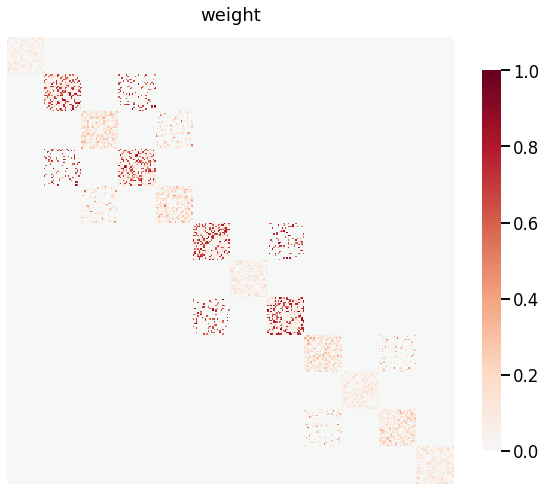

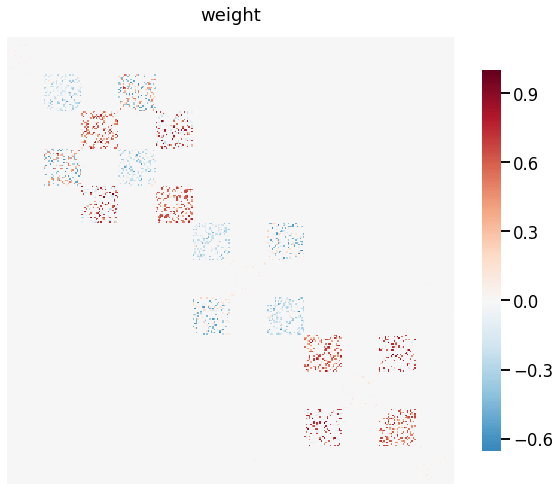

In [638]:
heatmap(B[0,:,:]/np.max(B[0,:,:]), title ='weight')
heatmap(B[1,:,:]/np.max(B[1,:,:]), title ='weight')

In [635]:
testAccuracy = predictAccuracy(B,a,b,e1,e2,A[1:160,:,:],y1[1:160],y2[1:160])    


[array([0.76583152]), array([0.89130829])] [array([0.44963079]), array([0.18812979])] 1 1
[array([0.79100874]), array([0.95688425])] [array([0.46918049]), array([0.19680161])] 1 1
[array([0.84596622]), array([0.92433225])] [array([0.48876106]), array([0.20368512])] 1 1
[array([0.85239709]), array([0.9069551])] [array([0.48926891]), array([0.20356036])] 1 1
[array([0.68276566]), array([0.92027386])] [array([0.41737585]), array([0.17633831])] 1 1
[array([0.78690796]), array([0.9352232])] [array([0.46455305]), array([0.19463636])] 1 1
[array([0.79701352]), array([0.89949713])] [array([0.46424445]), array([0.19386308])] 1 1
[array([0.78677775]), array([1.0147157])] [array([0.47494499]), array([0.2000648])] 1 1
[array([0.75527202]), array([0.80002599])] [array([0.43304838]), array([0.18012003])] 1 1
[array([0.83928271]), array([0.84630111])] [array([0.47560311]), array([0.19722674])] 1 1
[array([0.8364793]), array([0.89847576])] [array([0.48124385]), array([0.20033888])] 1 1
[array([0.75130

In [636]:
testAccuracy

array([[68.55345912],
       [37.73584906]])

In [483]:
a

array([[0.25622567, 0.25479511],
       [0.23132299, 0.23561466]])

In [595]:
a1 = np.asarray([[1,-1],[1,1]])
testAccuracy = predictAccuracy(B,a1,b,e1,e2,Atest,y1test,y2test) 

[array([0.73028247]), array([0.89860532])] [array([1.62888779]), array([0.16832286])] 1 1
[array([0.68695886]), array([0.87210127])] [array([1.55906013]), array([0.18514241])] 1 1
[array([0.72078807]), array([0.89524008])] [array([1.61602816]), array([0.17445201])] 1 1
[array([0.76005395]), array([0.89621792])] [array([1.65627186]), array([0.13616397])] 1 1
[array([0.75808668]), array([0.95005099])] [array([1.70813767]), array([0.19196431])] 1 1
[array([0.84667472]), array([0.98248322])] [array([1.82915794]), array([0.1358085])] 1 1
[array([0.77535835]), array([0.88688452])] [array([1.66224287]), array([0.11152618])] 1 1
[array([0.77988087]), array([0.8939352])] [array([1.67381607]), array([0.11405433])] 1 1
[array([0.80178109]), array([0.91501728])] [array([1.71679837]), array([0.11323619])] 1 1
[array([0.74487435]), array([0.94296526])] [array([1.68783962]), array([0.19809091])] 1 1
[array([0.82107414]), array([0.84450875])] [array([1.66558289]), array([0.02343461])] 1 0
[array([0.82

In [596]:
testAccuracy

array([[62.5],
       [50. ]])

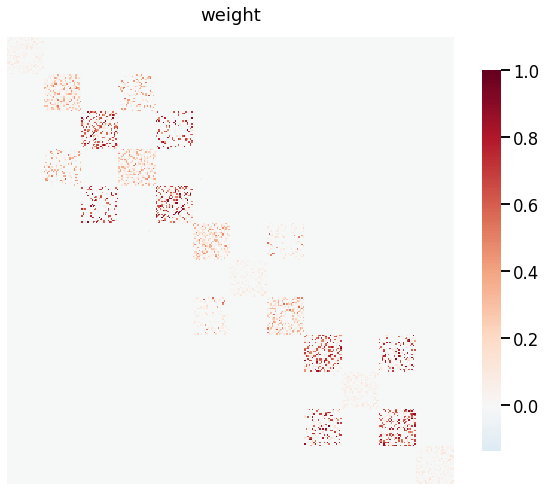

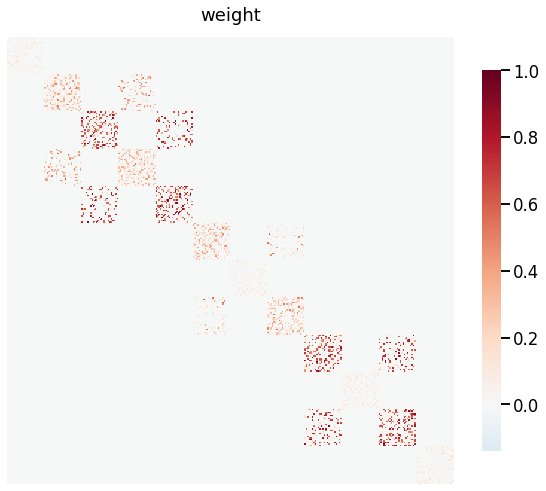

In [485]:
B1 = a[0,0]*B[0,:,:] + a[0,1]*B[1,:,:]
B2 = a[1,0]*B[0,:,:] + a[1,1]*B[1,:,:]
heatmap(B1/np.max(B1), title ='weight')
heatmap(B2/np.max(B2), title ='weight')

In [427]:
def fit_cls(A,e1,e2,y1,y2,iter,stepSize,rho,gamma):
    sampleTest,N,_ = A.shape
    dim1,_ = e1.shape
    dim2,_ = e2.shape
    
    B = np.ones((dim1,N,N), dtype=float)/(dim*N*N)
    a = np.zeros((dim2,dim1), dtype=float)
    b = 0
    
    S = np.zeros((dim1,1), dtype=float)

    for itr in range(1,iter):
        #loss = 0
        gradB = np.zeros((dim1,N,N), dtype=float)
        grada = np.zeros((dim2,dim1), dtype=float)
        sym = np.zeros((dim1,N,N), dtype=float)
        gradb = 0
        for k in range(0,sampleTest):
            tmp = b
            tmpGradB = np.zeros((dim1,N,N), dtype=float) 
            for j in range(0,dim1):
                if y1[k] == j:
                    for i in range(0,dim):
                        tmp -= e1[j,i]*np.sum(B[i,:,:]*A[k,:,:]) 
                        tmpGradB[i,:,:] -= e1[j,i]*A[k,:,:]
                else:
                    for i in range(0,dim):
                        tmp += e1[j,i]*np.sum(B[i,:,:]*A[k,:,:])
                        tmpGradB[i,:,:] += e1[j,i]*A[k,:,:]
                        
            for j in range(0,dim2):
                if y2[k] == j:
                    for i in range(0,dim):
                        tmp -= (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                        tmpGradB[i,:,:] -= ( e2[j,:].reshape(1,-1)@a[:,i].reshape(-1,1) )*A[k,:,:]
                else:
                    for i in range(0,dim):
                        tmp += (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                        tmpGradB[i,:,:] += ( e2[j,:].reshape(1,-1)@a[:,i].reshape(-1,1) )*A[k,:,:]
                        
        
            phi = ex(tmp)
            phi_ = phi/(1+phi)
            
            gradB += phi_*tmpGradB
            
        for i in range(0,dim):
            sym[i,:,:] = 2*(B[i,:,:]-B[i,:,:].T)

        gradB = gradB/sampleTest + rho*np.sign(B) + 2*gamma*B + sym
        B = B - stepSize*gradB
        
        for k in range(0,sampleTest):
            tmp = b
            tmpGrada = np.zeros((dim2,dim1),dtype=float)
            for j in range(0,dim1):
                if y1[k] == j:
                    for i in range(0,dim):
                        tmp -= e1[j,i]*np.sum(B[i,:,:]*A[k,:,:]) 
                else:
                    for i in range(0,dim):
                        tmp += e1[j,i]*np.sum(B[i,:,:]*A[k,:,:])
                        
            for j in range(0,dim2):
                if y2[k] == j:
                    for i in range(0,dim):
                        tmp -= (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                else:
                    for i in range(0,dim):
                        tmp += (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                        
                        
            for i in range(0,dim1):
                S[i] = np.sum(B[i,:,:]*A[k,:,:])
                
            
            for j in range(0,dim2):
                if y2[k] == j:
                    tmpGrada -= e2[j,:].reshape(-1,1)@S.reshape(1,-1)
                else:
                    tmpGrada += e2[j,:]@S
            
            phi = ex(tmp)
            phi_ = phi/(1+phi)
            
            grada += phi_*tmpGrada
        
        a = a - stepSize*grada/sampleTest
        #print(a)
        
        for k in range(0,sampleTest):
            tmp = b 
            for j in range(0,dim1):
                if y1[k] == j:
                    for i in range(0,dim):
                        tmp -= e1[j,i]*np.sum(B[i,:,:]*A[k,:,:]) 
                else:
                    for i in range(0,dim):
                        tmp += e1[j,i]*np.sum(B[i,:,:]*A[k,:,:])
                        
            for j in range(0,dim2):
                if y2[k] == j:
                    for i in range(0,dim):
                        tmp -= (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                else:
                    for i in range(0,dim):
                        tmp += (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                        
            #loss += log(1+phi)
            phi = ex(tmp)
            
            gradb += phi/(1+phi)
            
        b = b - stepSize*gradb/sampleTest
    #print(loss)
    return B,a,b

In [445]:
def predictAccuracy(B,a,b,e1,e2,A,y1,y2):
    l = len(y1)
    dim1,_ = e1.shape
    dim2,_ = e2.shape
    #print(y2)
    accuracy = np.zeros((2,1),dtype=float)
    S = np.zeros((dim1,1), dtype=float)
    
    for m in range(0,l):
        lbl1 = []
        lbl2 = []
        for i in range(0,dim1):
                S[i] = np.sum(B[i,:,:]*A[m,:,:])
                
        for j in range(0,dim1):
            lbl1.append(e1[j,:]@S)
            
        for j in range(0,dim2):
            lbl2.append(e2[j,:]@a@S)
        
        print(lbl1,lbl2,y1[m],y2[m])
        
        phen1 = np.argmax((np.asarray(lbl1)))
        phen2 = np.argmax((np.asarray(lbl2)))
        #print(e@R@A[i,:,:]@C,y[i])
        #print('hi')
        #print(cls, y[i])
        if phen1 == y1[m]:
            accuracy[0] += 1
            
        if phen2 == y2[m]:
            accuracy[1] += 1

    return accuracy*100/l

In [553]:
def paramPoint(A,B):
    dim,_,_ = B.shape
    pt = np.zeros((dim,1),dtype=float)
    
    for i in range(0,dim):
        pt[i] = np.sum(B[i,:,:]*A) 
        
    return pt

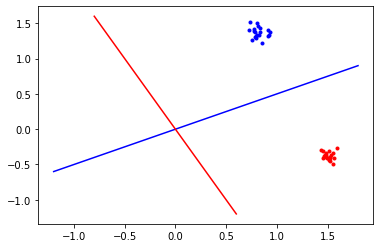

In [663]:
import numpy as np
import matplotlib.pyplot as plt

origin = [0], [0] # origin point
x1 = np.linspace(-1.2,1.8,1000)
x2 = np.linspace(-.8,.6,1000)

#plt.quiver(*origin, 300*e1[:,0], 300*e1[:,1], scale=400)
#plt.quiver(*origin, -300*e1[:,0], -300*e1[:,1], scale=400)

#plt.quiver(*origin, 300*e[:,0], 300*e[:,1], color = 'r', scale=1000)
#plt.quiver(*origin, -300*e[:,0], -300*e[:,1], color = 'b', scale=1000)
slope1 = e1[0][0]/e1[0][1]
slope2 = e1[1][0]/e1[1][1]

#print(slope1,slope2)
plt.plot(x1,slope1*x1,color='b')
plt.plot(x2,slope2*x2,color='r')

#plt.plot(x1/3,e[0][1]*(x1/3)/e[0][0],color='k')
#plt.plot(x2,e[1][1]*(x2)/e[1][0],color='k')
l = len(y1test)

for i in range(0,l):
    pt = paramPoint(Atest[i,:,:],B)
    if y1test[i] == 0:
        plt.plot(pt[0],pt[1],'.',color = 'b')
    else:
        plt.plot(pt[0],pt[1],'.',color = 'r')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

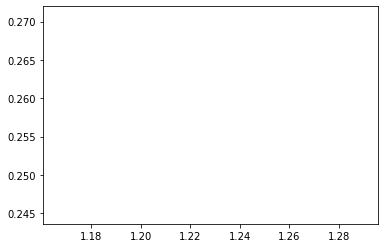

In [572]:
plt.plot(pt[0],pt[1])
plt.show

In [592]:
e = e1@np.asarray([[1,1],[-1,1]])

In [651]:
A.shape

(160, 300, 300)

In [652]:
l

200